In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

In [ ]:
%cd /content/drive/MyDrive/Repositories
!mkdir fabricDefectDetection
%cd fabricDefectDetection/

/content/drive/MyDrive/Repositories
mkdir: cannot create directory ‘fabricDefectDetection’: File exists
/content/drive/MyDrive/Repositories/fabricDefectDetection


In [ ]:
!wget https://internshala.com/uploads/chat-uploads/63de5ae96c77d1675516649-4647089.zip
!unzip 63de5ae96c77d1675516649-4647089.zip -d /

--2023-02-07 17:56:34--  https://internshala.com/uploads/chat-uploads/63de5ae96c77d1675516649-4647089.zip
Resolving internshala.com (internshala.com)... 15.206.118.4, 52.66.89.9
Connecting to internshala.com (internshala.com)|15.206.118.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-ap-southeast-1.amazonaws.com/internshala-uploads/chat-uploads/63de5ae96c77d1675516649-4647089.zip [following]
--2023-02-07 17:56:35--  https://s3-ap-southeast-1.amazonaws.com/internshala-uploads/chat-uploads/63de5ae96c77d1675516649-4647089.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.129.80
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.129.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4647089 (4.4M) [application/zip]
Saving to: ‘63de5ae96c77d1675516649-4647089.zip.6’

63de5ae96c77d167551 100%[===================>]   4.43M  3.22MB/s    i

In [ ]:
imgr = cv2.imread("/Data/Task4/Fabric13.jpg")
#imgr = cv2.imread("/content/u.jpg")
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

In [ ]:
imgr

array([[[111, 157, 172],
        [ 87, 116, 134],
        [133, 148, 169],
        ...,
        [138, 154, 151],
        [136, 161, 158],
        [162, 190, 191]],

       [[ 68, 104, 120],
        [104, 133, 149],
        [ 67,  88, 105],
        ...,
        [105, 125, 124],
        [130, 156, 157],
        [ 95, 125, 127]],

       [[104, 127, 145],
        [108, 136, 150],
        [114, 146, 157],
        ...,
        [ 90, 113, 119],
        [ 89, 116, 123],
        [142, 171, 177]],

       ...,

       [[159, 180, 185],
        [ 86, 105, 111],
        [195, 213, 223],
        ...,
        [173, 196, 202],
        [165, 183, 195],
        [145, 164, 181]],

       [[166, 185, 189],
        [154, 172, 176],
        [143, 157, 166],
        ...,
        [196, 206, 218],
        [153, 173, 184],
        [126, 158, 169]],

       [[109, 127, 129],
        [ 84,  99, 104],
        [184, 199, 206],
        ...,
        [148, 160, 172],
        [134, 146, 160],
        [140, 157, 173]]

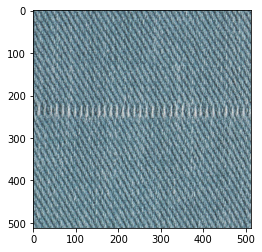

In [ ]:
plt.imshow(imgr)

In [ ]:
img = imgr.reshape(-1,3).astype(np.float32)

In [ ]:
img = cv2.bilateralFilter(img,9,75,75)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

In [ ]:
k=2
attempts = 10

In [ ]:
ret,label,center=cv2.kmeans(img,2,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [ ]:
center = center.astype(np.uint8)

In [ ]:
center.shape

In [ ]:
center

In [ ]:
label.shape

In [ ]:
label.flatten()[:10]

In [ ]:
label

In [ ]:
res = center[label.flatten()]
res
mask = np.array([[0,0,0],[255,255,255]])[label.flatten()].reshape((imgr.shape))

In [ ]:
mask

In [ ]:
plt.imshow(mask.reshape((imgr.shape)))

NameError: ignored

In [ ]:
mask.reshape((imgr.shape))[0]
 

array([[  0,   0,   0],
       [  0,   0,   0],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

In [ ]:
cv2.imwrite("/content/u.jpg",mask)

True

In [ ]:
pwd

'/content/drive/MyDrive/Repositories/fabricDefectDetection'

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!cp kmeans_seg.ipynb /content/drive/MyDrive/Repositories/fabricDefectDetection/python_notebook/